<a href="https://colab.research.google.com/github/Lizzy-Mejia/Data-Science-FemHack-challenge/blob/main/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Procesado y tratamiento de los datos
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer
pd.set_option("display.max_columns", None)

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Lectura del dataset
data = pd.read_csv('train.csv')
# Visualización inicial del conjunto de datos
data.head()

,train_idx,title,description,target,creator_name,creator_location,supporters,created_date,banner_image,full_content,victory_flag
0,0,Stop Iran Regime from Chairing U​.​N. Human Ri...,Rights Council 2023 Social Forum. This year's ...,['António Guterres'],UN Watch,"Geneva, Switzerland",80515,10 May 2023,https://assets.change.org/photos/2/ur/wj/vrUrW...,No Joke: The Islamic Republic of Iran has just...,0
1,1,Save Children In Poverty In Syria,Children in Syria are facing extreme poverty. ...,['UNICEF'],Maialen Alawam,"Watertown, MA, United States",23871,25 Jun 2020,https:https://static.change.org/images/default...,Children in Syria are facing extreme poverty. ...,0
2,2,Save Duke Ellington School Of The Arts,NaN,NaN,It’s Me Tivoni,United States,4051,"Nov. 20, 2022",https://assets.change.org/photos/8/ab/hv/DZaBH...,Save Duke Ellington School Of The ArtsTivoni H...,0
3,3,Mobile operators are creating inequality,"In India, after Reliance Jio (a 4G only mobile...","['Telecom Regulatory Authority of India', 'CEL...",Swastik Raj Chauhan,"Ghaziabad, India",350,"Oct 15, 2017",https://assets.change.org/photos/7/by/in/Kzbyi...,"In India, after Reliance Jio (a 4G only mobile...",0
4,4,Grant Military Burial Honors to Women WWII Pilots,"During World War II, a brave group of women jo...",['U.S. Senate'],Tiffany Miller @tiffbmiller,"Walnut Creek, CA, United States",176092,2 Dec 2015,https://assets.change.org/photos/3/lh/jc/TmLhJ...,"During World War II, a brave group of women jo...",1


In [9]:
data.tail()

,train_idx,title,description,target,creator_name,creator_location,supporters,created_date,banner_image,full_content,victory_flag
1960,1960,Justice pour Fortune,Une étudiante togolaise assassinée en France,['Pétition adressée à au Gouvernement Togolais...,Yao KLEGBAZA,Ghana,15341,Date de création 10 déc. 2022,https://assets.change.org/photos/3/im/dw/aLImD...,Une étudiante togolaise assassinée en France,1
1961,1961,100% Clean Renewable Energy by 2030.,"switch to 100% clean renewable energy by 2030,...","['The World', 'Joseph R. Biden', 'Boris Johnso...",Jack B.,"New Mexico, United States",4036,8 Aug 2021,https://assets.change.org/photos/2/nw/hz/dpNwH...,We have less than 7 years until the effects of...,0
1962,1962,Create a Fair and Compassionate UK Immigration...,treated?\nThis petition challenges the U.K. go...,"['Sajid Javid', 'Caroline Nokes', 'Diane Abbott']",D K Thomas,"Salisbury, ENG, United Kingdom",6393,"Jun 4, 2018",https://assets.change.org/photos/6/eo/ir/yUeOi...,"If your dream was to live in another country, ...",0
1963,1963,Approve my Social Security Disability,disability have been denied even though my med...,['Richard Burr'],Cel Layne,"Lynchburg, VA, United States",71938,20 Jan 2016,https://assets.change.org/photos/0/qa/ut/Fnqau...,I WANT TO PERSONALLY THANK EVERY ONE OF YOU FO...,1
1964,1964,50:50 Parliament want women to have equal seat...,. Please collaborate and take action to make ...,"['Prime Minister Boris Johnson', 'all party le...",Frances Scott and the 50:50 Parliament Team,"London, ENG, United Kingdom",53865,"Nov 27, 2013",https://assets.change.org/photos/1/xk/di/WJXKd...,In Parliament men outnumber women by more than...,0


In [10]:
data.sample(5)

,train_idx,title,description,target,creator_name,creator_location,supporters,created_date,banner_image,full_content,victory_flag
551,551,LEGALISE AFRICAN INDIGENOUS SPIRITUALITY,Indigenous Spirituality and its Diasporic deri...,"['UK Government', 'United Nations', 'United Na...",CADISS ORG,United Kingdom,1407,6 Aug 2020,https://assets.change.org/photos/5/og/ba/kDoGB...,In a millennium where ‘Religious Tolerance’ is...,0
1509,1509,Award Disability Living Allowance for Life for...,Award Disability Living Allowance for Life for...,['Sarah Newton MP'],Victoria MacDonald,"Corby, ENG, United Kingdom",401570,"Jul. 17, 2018",https://assets.change.org/photos/6/kt/sl/NXkTs...,Award Disability Living Allowance for Life for...,0
274,274,Ask Pope Francis to fight climate change with ...,"Your Holiness Pope Francis,\nThe world is faci...",['Pope Francis'],Matthew Glover,United Kingdom,94230,"Jan 23, 2019",https://assets.change.org/photos/1/tm/tx/titMt...,"Your Holiness Pope Francis,\n\nThe world is fa...",0
741,741,Ban Animal Exploitation in California,continue. There is no grey area when it comes ...,"['Gavin Newsom', 'Ben Hueso']",Mara Parker,"Westhaven-Moonstone, CA, United States",25815,"May 12, 2021",https://assets.change.org/photos/9/pt/lc/vQpTL...,The California circus ban hasn’t gone far enou...,0
589,589,JUNK THE ANTI-TERRORISM BILL AND UPHOLD HUMAN ...,DEFEND UPLB SAYS JUNK THE ANTI-TERRORISM BILL ...,['Philippines House of Representatives'],Defend UPLB,Philippines,36574,03-Jun-2020,https://assets.change.org/photos/3/pa/dh/juPAD...,DEFEND UPLB SAYS JUNK THE ANTI-TERRORISM BILL ...,0


In [11]:
# Visualización de la información básica del conjunto de datos
# Indica el número de filas del dataset
# Muestra el número de datos No Nulos por columna (valores validos)
# Tipo de dato de cada columna
# Tamaño total del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   train_idx         1965 non-null   int64 
 1   title             1965 non-null   object
 2   description       1848 non-null   object
 3   target            1848 non-null   object
 4   creator_name      1965 non-null   object
 5   creator_location  1953 non-null   object
 6   supporters        1965 non-null   int64 
 7   created_date      1965 non-null   object
 8   banner_image      1965 non-null   object
 9   full_content      1953 non-null   object
 10  victory_flag      1965 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 169.0+ KB


# Exploración de los datos

Evaluaremos las características de los datos para elegir las variables predictoras. Nuestro objetivo es obtener un conjunto de palabras "clave" que nos permitan caracterizar las peticiones. Para ello seguiremos la siguiente estretegia:

* Dado que los datos están en diferentes idiomas, nuestro primer objetivo es homogeneizar los datos a un mismo idioma.

* Haremos limpieza de datos para eliminar datos vacíos y sin sentido

* Estudiar los datos para identificar las columnas que se usarán como variables predictoras



### Victory Flag


In [50]:
data["victory_flag"].value_counts(dropna=False)

0    1680
1     285
Name: victory_flag, dtype: int64

In [13]:
no_firmadas = data["victory_flag"].value_counts()[0]
total = data.shape[0]
print("El porcentaje de peticiones no exitosas es: ", (no_firmadas)*100/total)

firmadas = data["victory_flag"].value_counts()[1]
print("El porcentaje de peticiones exitosas es: ", (firmadas)*100/total)

El porcentaje de peticiones no exitosas es:  85.49618320610686
El porcentaje de peticiones exitosas es:  14.50381679389313


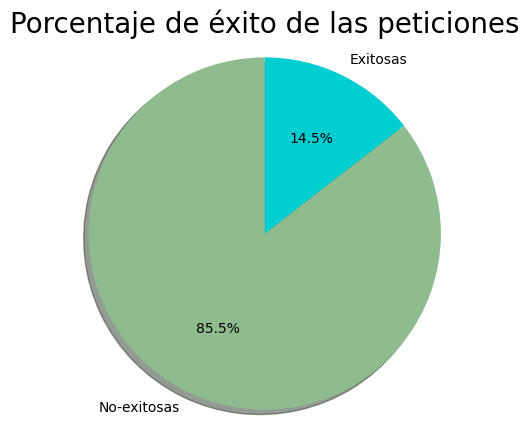

In [14]:
labels =["No-exitosas", "Exitosas"]

values = [(data["victory_flag"].value_counts()[0])*100/total,(data["victory_flag"].value_counts()[1])*100/total]
explode = (0, 0,)
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(values, explode =explode, labels=labels, autopct = "%1.1f%%", shadow = True, startangle=90, colors=["darkseagreen", "darkturquoise","coral","lavender"])
ax.axis("equal")
plt.title("Porcentaje de éxito de las peticiones", size=20)
plt.show()

Notemos que el mayor porcentaje está cubierto por aquellas peticiones que no tuvieron éxito. Esto podría causar problemas en el entrenamiento del modelo.En secciones adelante nos encargaremos de su tratamiento.

## Detección de idioma

In [15]:
!pip install translate
!pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=979b6b1bdb9bd3eb10117de56f5d1af74c4ea339f22e183c6881b438e7bc0c19
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


Agregaremos una columna al dataframe (**languaje**) que nos ayudará a detectar el idioma en el que se encuentra escrita cada petición. Esto será una parte fundamental para poder hacer las traducciones correspondientes.

In [16]:
#Función de detección de lenguaje

df=data
import pandas as pd
from langdetect import detect

# Función para detectar el idioma de un texto
def detect_language(text):
    try:
        lang = detect(text)
    except:
        lang = 'unknown'
    return lang

# Aplicar la detección de idioma a la columna 'text_column'
df['languaje'] = df['title'].apply(detect_language)

# Imprimir el DataFrame con el idioma detectado
print(df["languaje"])

0       en
1       en
2       en
3       en
4       en
        ..
1960    fr
1961    en
1962    en
1963    en
1964    en
Name: languaje, Length: 1965, dtype: object


In [17]:
df.head()

,train_idx,title,description,target,creator_name,creator_location,supporters,created_date,banner_image,full_content,victory_flag,languaje
0,0,Stop Iran Regime from Chairing U​.​N. Human Ri...,Rights Council 2023 Social Forum. This year's ...,['António Guterres'],UN Watch,"Geneva, Switzerland",80515,10 May 2023,https://assets.change.org/photos/2/ur/wj/vrUrW...,No Joke: The Islamic Republic of Iran has just...,0,en
1,1,Save Children In Poverty In Syria,Children in Syria are facing extreme poverty. ...,['UNICEF'],Maialen Alawam,"Watertown, MA, United States",23871,25 Jun 2020,https:https://static.change.org/images/default...,Children in Syria are facing extreme poverty. ...,0,en
2,2,Save Duke Ellington School Of The Arts,NaN,NaN,It’s Me Tivoni,United States,4051,"Nov. 20, 2022",https://assets.change.org/photos/8/ab/hv/DZaBH...,Save Duke Ellington School Of The ArtsTivoni H...,0,en
3,3,Mobile operators are creating inequality,"In India, after Reliance Jio (a 4G only mobile...","['Telecom Regulatory Authority of India', 'CEL...",Swastik Raj Chauhan,"Ghaziabad, India",350,"Oct 15, 2017",https://assets.change.org/photos/7/by/in/Kzbyi...,"In India, after Reliance Jio (a 4G only mobile...",0,en
4,4,Grant Military Burial Honors to Women WWII Pilots,"During World War II, a brave group of women jo...",['U.S. Senate'],Tiffany Miller @tiffbmiller,"Walnut Creek, CA, United States",176092,2 Dec 2015,https://assets.change.org/photos/3/lh/jc/TmLhJ...,"During World War II, a brave group of women jo...",1,en


In [18]:
df["languaje"].unique()

array(['en', 'hr', 'pt', 'es', 'fr', 'it', 'ja', 'ro', 'de', 'fi', 'et',
       'nl', 'tl', 'af', 'id', 'uk', 'ru', 'mk', 'ca', 'bg', 'so', 'da',
       'vi', 'no', 'hu', 'pl', 'sk', 'cy', 'th', 'ar', 'tr', 'sl'],
      dtype=object)

In [19]:
df["languaje"].value_counts()

en    1540
fr     130
it      62
de      54
pt      24
ru      22
es      19
ca      15
tl      12
ro      10
da       9
id       8
nl       6
et       5
af       5
hr       5
tr       4
uk       4
no       4
ja       3
vi       3
pl       3
bg       3
so       3
hu       2
sk       2
cy       2
fi       2
mk       1
th       1
ar       1
sl       1
Name: languaje, dtype: int64

In [20]:
eng = df["languaje"].value_counts()["en"]
tot = df.shape[0]

porc_eng=(eng*100)/tot
print(porc_eng)

78.37150127226464


Notemos que casi el **79%** de los datos se encuentran en idioma inglés. Más adelante todos los títulos se traducirán a ese idioma con el objetivo de estandarizar los datos. A continuación se mostrarán los idiomas más recurrentes en un diagrama de barras.

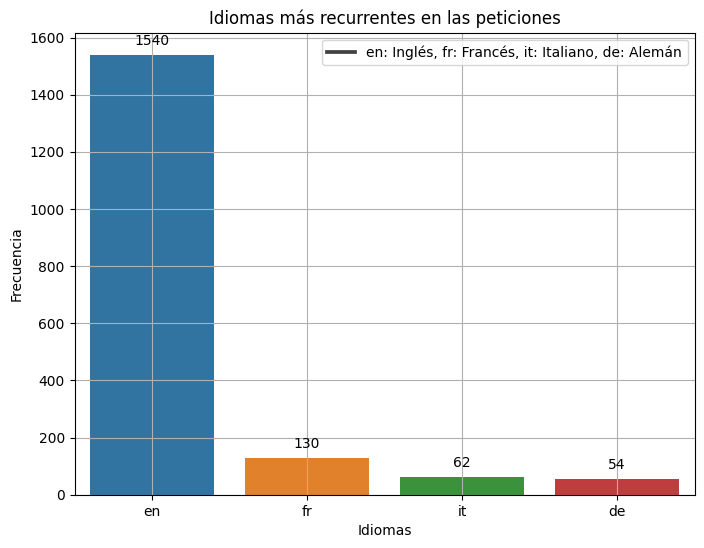

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra el dataframe para obtener solo las filas que correspondan a los lenguajes que deseas graficar
lenguajes_seleccionados = ['en', 'fr', 'it','de']
df_seleccionado = df[df['languaje'].isin(lenguajes_seleccionados)]

# Calcula la frecuencia de cada lenguaje seleccionado
conteo_lenguajes = df_seleccionado['languaje'].value_counts()

# Crea la gráfica de barras utilizando barplot() de Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=conteo_lenguajes.index, y=conteo_lenguajes.values)
plt.xlabel('Idiomas')
plt.ylabel('Frecuencia')
plt.grid()
# Agrega la leyenda
plt.legend(labels=['en: Inglés, fr: Francés, it: Italiano, de: Alemán'])
plt.title('Idiomas más recurrentes en las peticiones')

# Agrega la frecuencia a cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', xytext = (0, 5), textcoords = 'offset points')

plt.show()



Si hacemos el conteo del número de peticiones en estos idiomas obtenemos que se trata del **94.8%** del total, entonces podemos encargarnos de evaluar los datos en estos idiomas predominantemente.

Dado el desequilibrio que existe en los datos, evaluaremos si no estamos perdiendo demasiados datos con peticiones "exitosas":

In [22]:
print(df[df["victory_flag"]==1]["languaje"].value_counts())
pet_exit=df[df["victory_flag"]==1]["languaje"].value_counts().sum()
print("Número de peticiones exitosas: ",pet_exit)

en    238
fr     20
it      7
de      5
da      3
pt      3
id      2
et      1
ru      1
cy      1
no      1
tr      1
tl      1
ca      1
Name: languaje, dtype: int64
Número de peticiones exitosas:  285


Podemos observar que estamos perdiendo **15** peticiones exitosas, que equivalen al **5.26%** de estas. Para balancear esta pérdida de datos usaremos la técnica SMOTE: *Synthetic Minority Oversampling Technique* que se abordará más adelante.

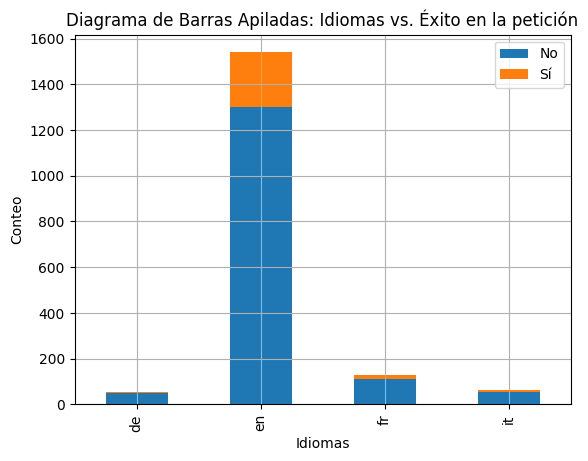

In [23]:
# Filtra el dataframe para obtener solo las filas que correspondan a los lenguajes deseados
lenguajes_seleccionados = ['en', 'fr', 'it','de']
df_seleccionado = df[df['languaje'].isin(lenguajes_seleccionados)]

# Crea una tabla de contingencia entre los idiomas y las salidas de la columna "flag"
tabla_contingencia = pd.crosstab(df_seleccionado['languaje'], df_seleccionado['victory_flag'])

# Crea el diagrama de barras apiladas utilizando el método plot() de Pandas
ax = tabla_contingencia.plot(kind='bar', stacked=True)

# Configura los ejes y la leyenda
plt.xlabel('Idiomas')
plt.ylabel('Conteo')
plt.title('Diagrama de Barras Apiladas: Idiomas vs. Éxito en la petición')
plt.grid()
leyenda = ["No","Sí"]
ax.legend(leyenda)

# Muestra el diagrama
plt.show()



## Países

Mediante una evaluación rápida de los datos pudimos observar que existen muchos países que no están agrupados, por ejemplo, hay datos que pertenecen al mismo país y están registrados de forma distinta. En esta sección abordamos esa cuestión.

In [24]:
df["creator_location"].value_counts()

United States                   111
Australia                        72
France                           68
United Kingdom                   61
Canada                           58
                               ... 
Montclair, VA, United States      1
Glenmont, NY, United States       1
Lees Summit, United States        1
Strasbourg, France                1
Lynchburg, VA, United States      1
Name: creator_location, Length: 910, dtype: int64

In [25]:
#Regiones que solo se repiten una vez
df["creator_location"].value_counts()[df["creator_location"].value_counts()==1]

Bedworth, ENG, United Kingdom         1
Peterborough, ENG, United Kingdom     1
Jerseyville, IL, United States        1
ERROR 403: Access denied., Украина    1
Westerville, OH, United States        1
                                     ..
Montclair, VA, United States          1
Glenmont, NY, United States           1
Lees Summit, United States            1
Strasbourg, France                    1
Lynchburg, VA, United States          1
Name: creator_location, Length: 716, dtype: int64

In [26]:
#Agrupación de los países
import math

for i in range(df.shape[0]):
    location = df.loc[i, "creator_location"]
    if isinstance(location, str) and "United States" in location:
        df.at[i, "creator_location"] = "United States"

for i in range(df.shape[0]):
    location = df.loc[i, "creator_location"]
    if isinstance(location, str) and "Estados Unidos" in location:
        df.at[i, "creator_location"] = "United States"

for i in range(df.shape[0]):
    location = df.loc[i, "creator_location"]
    if isinstance(location, str) and "United Kingdom" in location:
        df.at[i, "creator_location"] = "United Kingdom"

for i in range(df.shape[0]):
    location = df.loc[i, "creator_location"]
    if isinstance(location, str) and "London" in location:
        df.at[i, "creator_location"] = "United Kingdom"

for i in range(df.shape[0]):
    location = df.loc[i, "creator_location"]
    if isinstance(location, str) and "France" in location:
        df.at[i, "creator_location"] = "France"

for i in range(df.shape[0]):
    location = df.loc[i, "creator_location"]
    if isinstance(location, str) and "Canada" in location:
        df.at[i, "creator_location"] = "Canada"

for i in range(df.shape[0]):
    location = df.loc[i, "creator_location"]
    if isinstance(location, str) and "Australia" in location:
        df.at[i, "creator_location"] = "Australia"

for i in range(df.shape[0]):
    location = df.loc[i, "creator_location"]
    if isinstance(location, str) and "Italia" in location:
        df.at[i, "creator_location"] = "Italia"

for i in range(df.shape[0]):
    location = df.loc[i, "creator_location"]
    if isinstance(location, str) and "India" in location:
        df.at[i, "creator_location"] = "India"

for i in range(df.shape[0]):
    location = df.loc[i, "creator_location"]
    if isinstance(location, str) and "Brasil" in location:
        df.at[i, "creator_location"] = "Brasil"

for i in range(df.shape[0]):
    location = df.loc[i, "creator_location"]
    if isinstance(location, str) and "Argentina" in location:
        df.at[i, "creator_location"] = "Argentina"

for i in range(df.shape[0]):
    location = df.loc[i, "creator_location"]
    if isinstance(location, str) and "México" in location:
        df.at[i, "creator_location"] = "México"

for i in range(df.shape[0]):
    location = df.loc[i, "creator_location"]
    if isinstance(location, str) and "Phil" in location:
        df.at[i, "creator_location"] = "Philippines"

for i in range(df.shape[0]):
    location = df.loc[i, "creator_location"]
    if isinstance(location, str) and "Switzerland" in location:
        df.at[i, "creator_location"] = "Switzerland"

for i in range(df.shape[0]):
    location = df.loc[i, "creator_location"]
    if isinstance(location, str) and "Ireland" in location:
        df.at[i, "creator_location"] = "Ireland"

for i in range(df.shape[0]):
    location = df.loc[i, "creator_location"]
    if isinstance(location, str) and "Germany" in location:
        df.at[i, "creator_location"] = "Germany"

for i in range(df.shape[0]):
    location = df.loc[i, "creator_location"]
    if isinstance(location, str) and "China" in location:
        df.at[i, "creator_location"] = "China"

for i in range(df.shape[0]):
    location = df.loc[i, "creator_location"]
    if isinstance(location, str) and "Colombia" in location:
        df.at[i, "creator_location"] = "Colombia"

for i in range(df.shape[0]):
    location = df.loc[i, "creator_location"]
    if isinstance(location, str) and "South Africa" in location:
        df.at[i, "creator_location"] = "South Africa"





In [27]:
df["creator_location"].value_counts()

United States                 627
United Kingdom                278
Canada                        189
Australia                     163
France                        121
                             ... 
г. Октябрьский, РБ, Россия      1
singapore, Singapore            1
Puerto Viejo, Costa Rica        1
Indien                          1
Reino Unido                     1
Name: creator_location, Length: 172, dtype: int64

In [28]:
df["creator_location"].unique()

array(['Switzerland', 'United States', 'India', 'Canada', 'Australia',
       'Brasil', 'Ireland', 'Colombia', 'France', 'United Kingdom',
       'Italia', 'Philippines', 'Honduras', '日本', 'South Africa',
       'Singapore, Singapore', 'Brussels, Belgium',
       'Auckland, New Zealand', 'Netherlands', 'Kota, भारत',
       'กรุงเทพ, Thailand', 'Baghdad, Iraq', 'Jakarta, NY, Indonesia',
       'भारत', 'Antigua and Barbuda', 'Bogota, Colombie',
       'hamoir, Belgium', 'Украина', 'г. Октябрьский, РБ, Россия',
       'Germany', 'Seoul, Korea, Republic of', 'Malaysia',
       'singapore, Singapore', 'Астрахань, Россия', nan, 'Accra, Ghana',
       'Jounieh, Lebanon', 'Türkiye', 'Санкт-Петербург, Россия', 'Россия',
       'Earth', 'POS, Trinidad and Tobago', 'Беларусь',
       'Hjellestad, Norway', 'Namibia', 'Potsdam, Deutschland', 'Egypt',
       'Tunis, AL, Tunisia', 'Kenya', 'Rishon Le Zion, Израиль',
       'Kuala Lumpur, Malaysia', 'Puerto Rico', 'Singapore',
       'Hamilton, New Ze

In [53]:
#Países con mayores incidencias en peticiones
paises=dict(df["creator_location"].value_counts()[df["creator_location"].value_counts()>50])
print(paises)

{'United States': 627, 'United Kingdom': 278, 'Canada': 189, 'Australia': 163, 'France': 121, 'India': 111, 'Italia': 64}


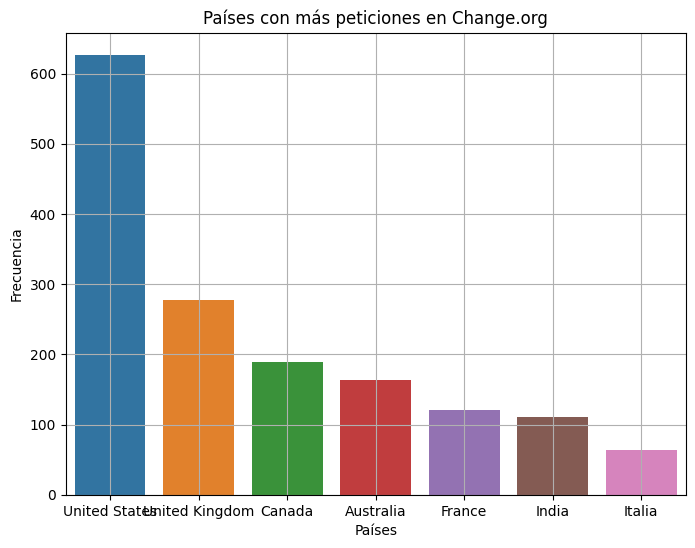

In [30]:
pais = list(paises.keys())
frecuencias = list(paises.values())

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=pais, y=frecuencias)
plt.xlabel('Países')
plt.ylabel('Frecuencia')
plt.title('Países con más peticiones en Change.org')
plt.grid()

plt.show()



## Supporters

Analizaremos el comportamiento de la variable  "*supporters*"  y su relación con otras columnas. Esta variable intuitivamente es importante pues mientras mayor sea el apoyo de una petición es mayor su impacto social.

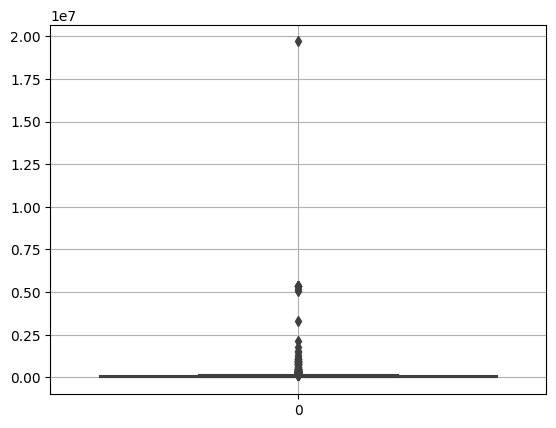

In [31]:
# Crear un boxplot de una columna específica utilizando Seaborn
sns.boxplot(data=df["supporters"])
plt.grid()
# Mostrar el gráfico
plt.show()

In [32]:
df["supporters"].describe()

count    1.965000e+03
mean     1.016367e+05
std      5.772946e+05
min      5.000000e+00
25%      5.505000e+03
50%      2.555000e+04
75%      6.947200e+04
max      1.968976e+07
Name: supporters, dtype: float64

De la gráfica anterior y el método *describe* podemos concluir lo siguiente:
* El rango de valores es muy amplio (el mínimo de firmantes es de 5 personas y el máximo es de 1.968e+7)
* En el boxplot observamos que existen varios outliers, por lo tanto, esto genera que también las medidas de tendencia central se vean afectadas.

Evaluaremos la correlación de esta variable con la variable objetivo.

<ipython-input-33-1eb64af48a71>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["victory_flag"].sort_values(ascending= False).plot(kind = "bar", color= "purple")


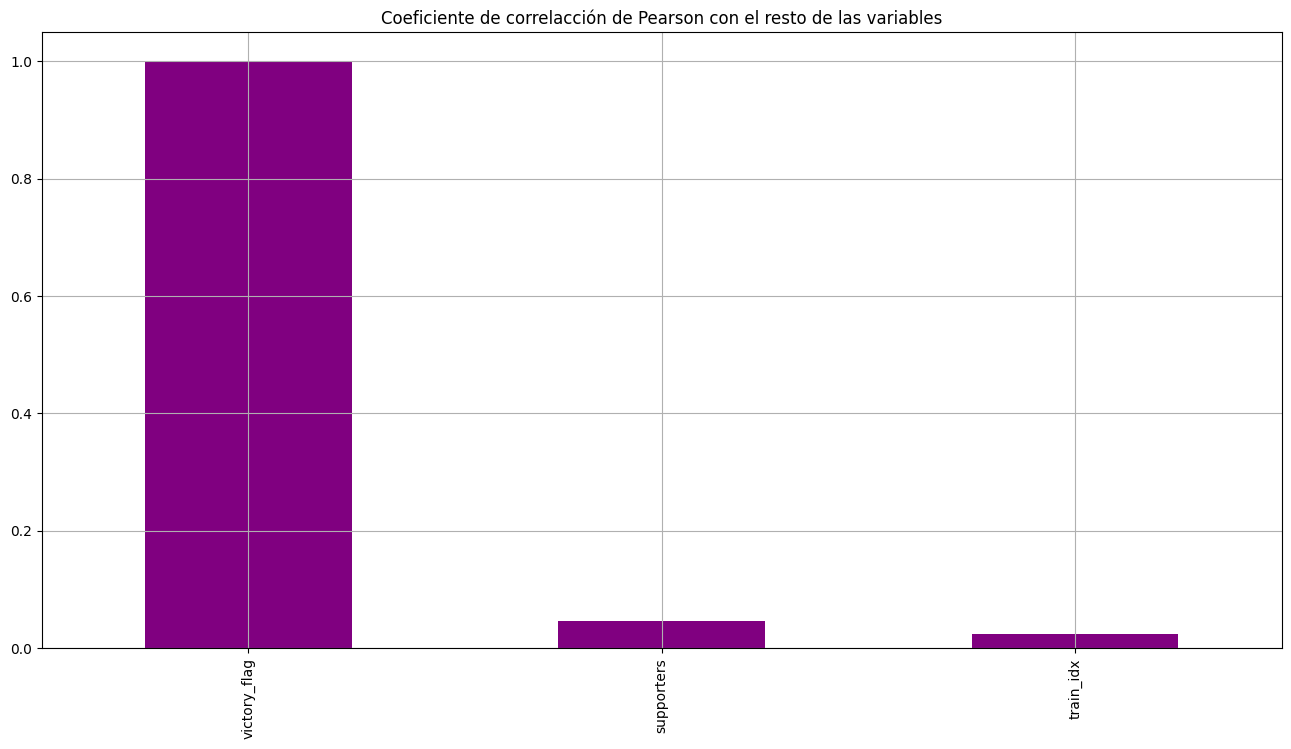

In [33]:
#Graficar la correlación entre victory_flag & esta variable

plt.figure(figsize=(16,8))
df.corr()["victory_flag"].sort_values(ascending= False).plot(kind = "bar", color= "purple")
plt.title("Coeficiente de correlacción de Pearson con el resto de las variables")
plt.grid()

La gráfica anterior muestra que existe una correlación lineal débil entre la variable objetivo y "*supporters*". Por lo tanto, puede ser útil no considerarla en los modelos con el fin de evitar sesgo en el entrenamiento.

Evaluaremos alternativamente la relación entre *supporters* y la cantidad de peticiones exitosas. Nuestra hipótesis es que mientras mayor sea la cantidad de "firmas" más exitosas tendrían que ser las peticiones (que se reflejaría en una mayhor cantidad de peticiones exitosas).

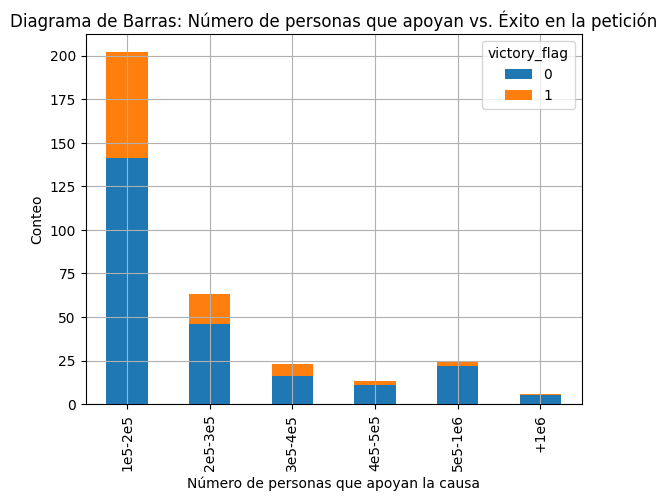

In [34]:
bins = [1e5, 2e5,3e5,4e5,5e5,1e6, 1.2e6]
labels = ['1e5-2e5', '2e5-3e5', '3e5-4e5', '4e5-5e5','5e5-1e6','+1e6']

df['support'] = pd.cut(df['supporters'], bins=bins, labels=labels, right=False)

# Contar las ocurrencias de cada combinación de A_range y B
counts = df.groupby(['support', 'victory_flag']).size().unstack()

# Crear el diagrama de barras apiladas
counts.plot(kind='bar', stacked=True)

# Configurar los ejes y la leyenda
plt.xlabel('Número de personas que apoyan la causa')
plt.ylabel('Conteo')
plt.title('Diagrama de Barras: Número de personas que apoyan vs. Éxito en la petición')
leyenda = ["No","Sí"]
plt.grid()
ax.legend(leyenda)

# Mostrar el diagrama
plt.show()

Dado que no es claro que la hipótesis se cumpla, podemos eliminar esta variable en el entrenamiento de los modelos para evitar sesgo.

## Palabras más comunes en el título

Comenzaremos por separar las peticiones "exitosas" de las que no lo fueron. Se clasificará como "*positive*" a las del primer grupo y como "*negative*" a las del segundo.

In [35]:
positive = df[df['victory_flag'] == 1]

In [36]:
positive.head()

,train_idx,title,description,target,creator_name,creator_location,supporters,created_date,banner_image,full_content,victory_flag,languaje,support
4,4,Grant Military Burial Honors to Women WWII Pilots,"During World War II, a brave group of women jo...",['U.S. Senate'],Tiffany Miller @tiffbmiller,United States,176092,2 Dec 2015,https://assets.change.org/photos/3/lh/jc/TmLhJ...,"During World War II, a brave group of women jo...",1,en,1e5-2e5
7,7,Open a federal investigation into the fatal po...,"On August 5, 2014, our son John Crawford III w...",['Ohio Attorney General Mike Dewine'],John Crawford III Family,United States,103050,2 Sep 2014,https://assets.change.org/photos/9/ml/cr/tImLC...,"On August 5, 2014, our son John Crawford III w...",1,en,1e5-2e5
33,33,Playmobil: Please make disability toys and hel...,"Hello Playmobil, \nPlease change the way kids ...",['Playmobil'],rebecca atkinson,United Kingdom,49909,19 May 2015,https://assets.change.org/photos/7/jl/kc/WZJlK...,"Hello Playmobil,\n\nPlease change the way kids...",1,en,NaN
34,34,Let Nikki Peet Start A Gay-Straight Alliance i...,"The principal of Flour Bluff High School, a pu...",['Lynn Kaylor'],Shannon Cuttle,United States,54337,"Feb 24, 2011",https://assets.change.org/photos/9/as/gi/zkasG...,"The principal of Flour Bluff High School, a pu...",1,en,NaN
35,35,Don't make domestic violence victims pay to st...,"This summer, I got a phone call that nobody wa...",['Verizon'],Cynthia Butterworth,United States,192463,13 Aug 2012,https://assets.change.org/photos/8/mz/hh/zVmZH...,"This summer, I got a phone call that nobody wa...",1,en,1e5-2e5


In [37]:
negative = df[df['victory_flag'] == 0]

In [38]:
negative.head()

,train_idx,title,description,target,creator_name,creator_location,supporters,created_date,banner_image,full_content,victory_flag,languaje,support
0,0,Stop Iran Regime from Chairing U​.​N. Human Ri...,Rights Council 2023 Social Forum. This year's ...,['António Guterres'],UN Watch,Switzerland,80515,10 May 2023,https://assets.change.org/photos/2/ur/wj/vrUrW...,No Joke: The Islamic Republic of Iran has just...,0,en,NaN
1,1,Save Children In Poverty In Syria,Children in Syria are facing extreme poverty. ...,['UNICEF'],Maialen Alawam,United States,23871,25 Jun 2020,https:https://static.change.org/images/default...,Children in Syria are facing extreme poverty. ...,0,en,NaN
2,2,Save Duke Ellington School Of The Arts,NaN,NaN,It’s Me Tivoni,United States,4051,"Nov. 20, 2022",https://assets.change.org/photos/8/ab/hv/DZaBH...,Save Duke Ellington School Of The ArtsTivoni H...,0,en,NaN
3,3,Mobile operators are creating inequality,"In India, after Reliance Jio (a 4G only mobile...","['Telecom Regulatory Authority of India', 'CEL...",Swastik Raj Chauhan,India,350,"Oct 15, 2017",https://assets.change.org/photos/7/by/in/Kzbyi...,"In India, after Reliance Jio (a 4G only mobile...",0,en,NaN
5,5,Don't Violate the Charter of Rights,rulings that find he or his government have vi...,"['Doug Ford', 'Doug Downey', 'Premier Doug Ford']",Democracy Watch,Canada,36053,"Sep 12, 2018",https://assets.change.org/photos/1/ox/ge/EHOXg...,Ontario Premier Doug Ford is following up on h...,0,en,NaN


In [39]:
#Transformar la Serie de los títulos a lista
sentences = df['title'].tolist()
len(sentences)

1965

In [40]:
print(sentences)

['Stop Iran Regime from Chairing U\u200b.\u200bN. Human Rights Council Forum', 'Save Children In Poverty In Syria', 'Save Duke Ellington School Of The Arts', 'Mobile operators are creating inequality', 'Grant Military Burial Honors to Women WWII Pilots', "Don't Violate the Charter of Rights", "Use Chargers' termination fee to provide housing", 'Open a federal investigation into the fatal police shooting of John Crawford III. Release video of shooting.', 'Keep Trans Kids in Sports Aligned With Their Gender Identity', 'Indigenous Emoji - AU', 'MANIFESTO DA ESPERANÇA - Por Dignidade e Respeito à População LGBTQIAP+', 'Fibromyalgia to be recognised as an Official Disability in the Rep. Of Ireland', 'Agawam Conservation Commission’s ruling puts Crowleys Horses out of business', 'NO al reconocimiento de Doctor Honoris Causa en Economía a Iván Duque en Corea del Sur', 'Free Sanitary Pads/Menstrual Cup by Govt of India to females living below the poverty line', "Insecticides tueurs d'abeilles:

In [41]:
#Concatena todos los elementos de la lista separándolos por espacio
sentences_as_one_string = " ".join(sentences)

In [42]:
sentences_as_one_string

'Stop Iran Regime from Chairing U\u200b.\u200bN. Human Rights Council Forum Save Children In Poverty In Syria Save Duke Ellington School Of The Arts Mobile operators are creating inequality Grant Military Burial Honors to Women WWII Pilots Don\'t Violate the Charter of Rights Use Chargers\' termination fee to provide housing Open a federal investigation into the fatal police shooting of John Crawford III. Release video of shooting. Keep Trans Kids in Sports Aligned With Their Gender Identity Indigenous Emoji - AU MANIFESTO DA ESPERANÇA - Por Dignidade e Respeito à População LGBTQIAP+ Fibromyalgia to be recognised as an Official Disability in the Rep. Of Ireland Agawam Conservation Commission’s ruling puts Crowleys Horses out of business NO al reconocimiento de Doctor Honoris Causa en Economía a Iván Duque en Corea del Sur Free Sanitary Pads/Menstrual Cup by Govt of India to females living below the poverty line Insecticides tueurs d\'abeilles: pas de dérogation ! Reinstate Night Tube f

## Nube de palabras más comunes en las peticiones

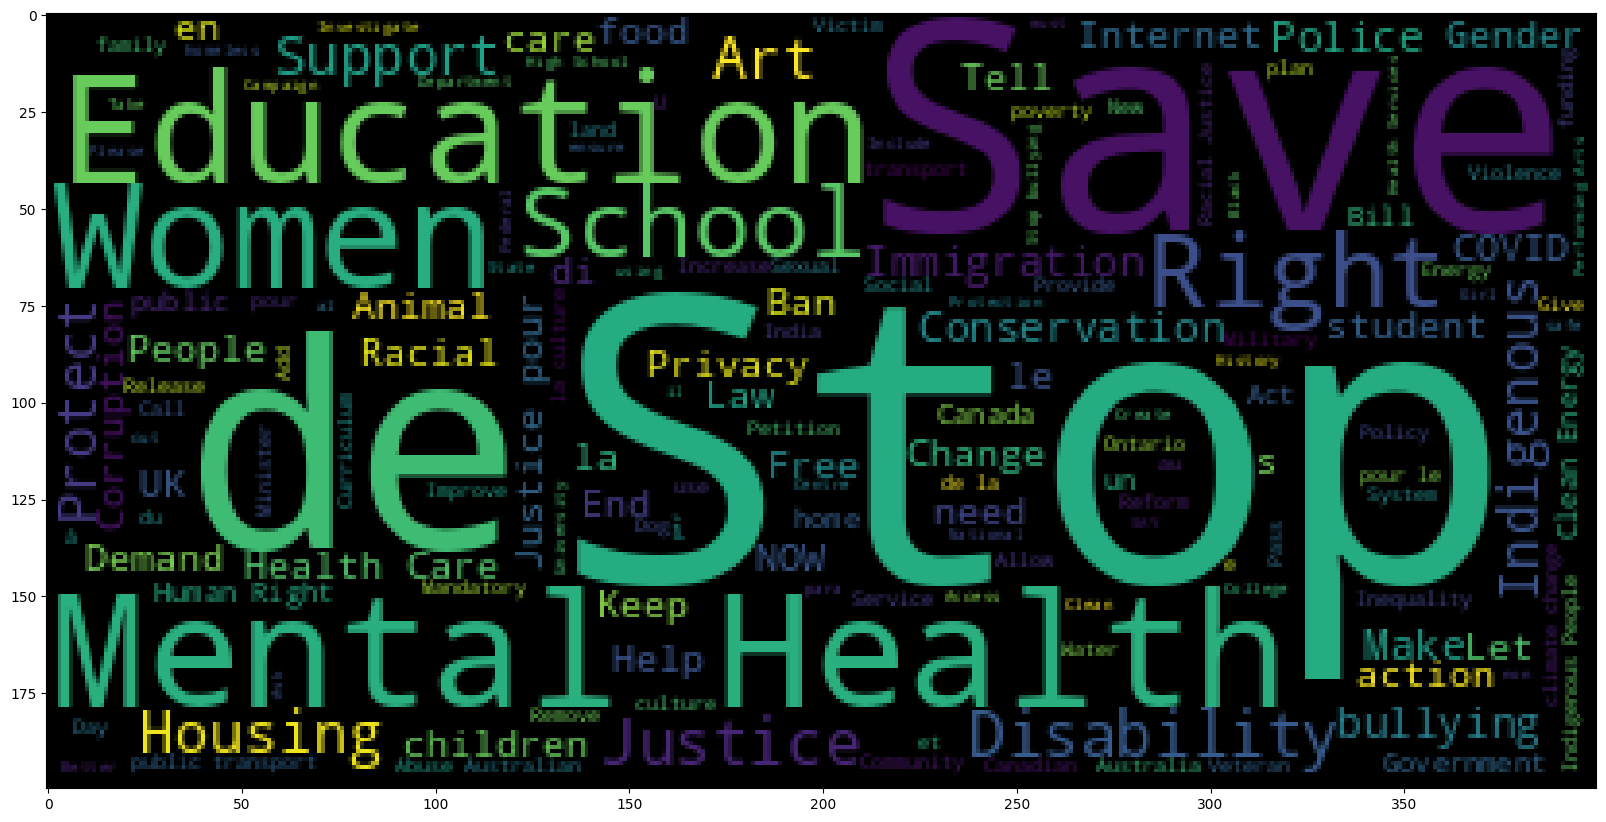

In [43]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))

#Generar una nube de palabras a partir sentences_as_one_string (títulos en general)
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [44]:
#Generar lista a partir de df negative
negative_list = negative['title'].tolist()
negative_list

['Stop Iran Regime from Chairing U\u200b.\u200bN. Human Rights Council Forum',
 'Save Children In Poverty In Syria',
 'Save Duke Ellington School Of The Arts',
 'Mobile operators are creating inequality',
 "Don't Violate the Charter of Rights",
 "Use Chargers' termination fee to provide housing",
 'Keep Trans Kids in Sports Aligned With Their Gender Identity',
 'Indigenous Emoji - AU',
 'MANIFESTO DA ESPERANÇA - Por Dignidade e Respeito à População LGBTQIAP+',
 'Fibromyalgia to be recognised as an Official Disability in the Rep. Of Ireland',
 'Agawam Conservation Commission’s ruling puts Crowleys Horses out of business',
 'NO al reconocimiento de Doctor Honoris Causa en Economía a Iván Duque en Corea del Sur',
 'Free Sanitary Pads/Menstrual Cup by Govt of India to females living below the poverty line',
 "Insecticides tueurs d'abeilles: pas de dérogation !",
 "Reinstate Night Tube for Winter 2021/2022 to improve Women's Safety traveling home in LDN",
 "Respect student's privacy and sto

## Nube de palabras más comunes en las peticiones NO exitosas

In [45]:
#Concatenar los elementos de la lista separandolos por espacios
negative_sentences_as_one_string = " ".join(negative_list)

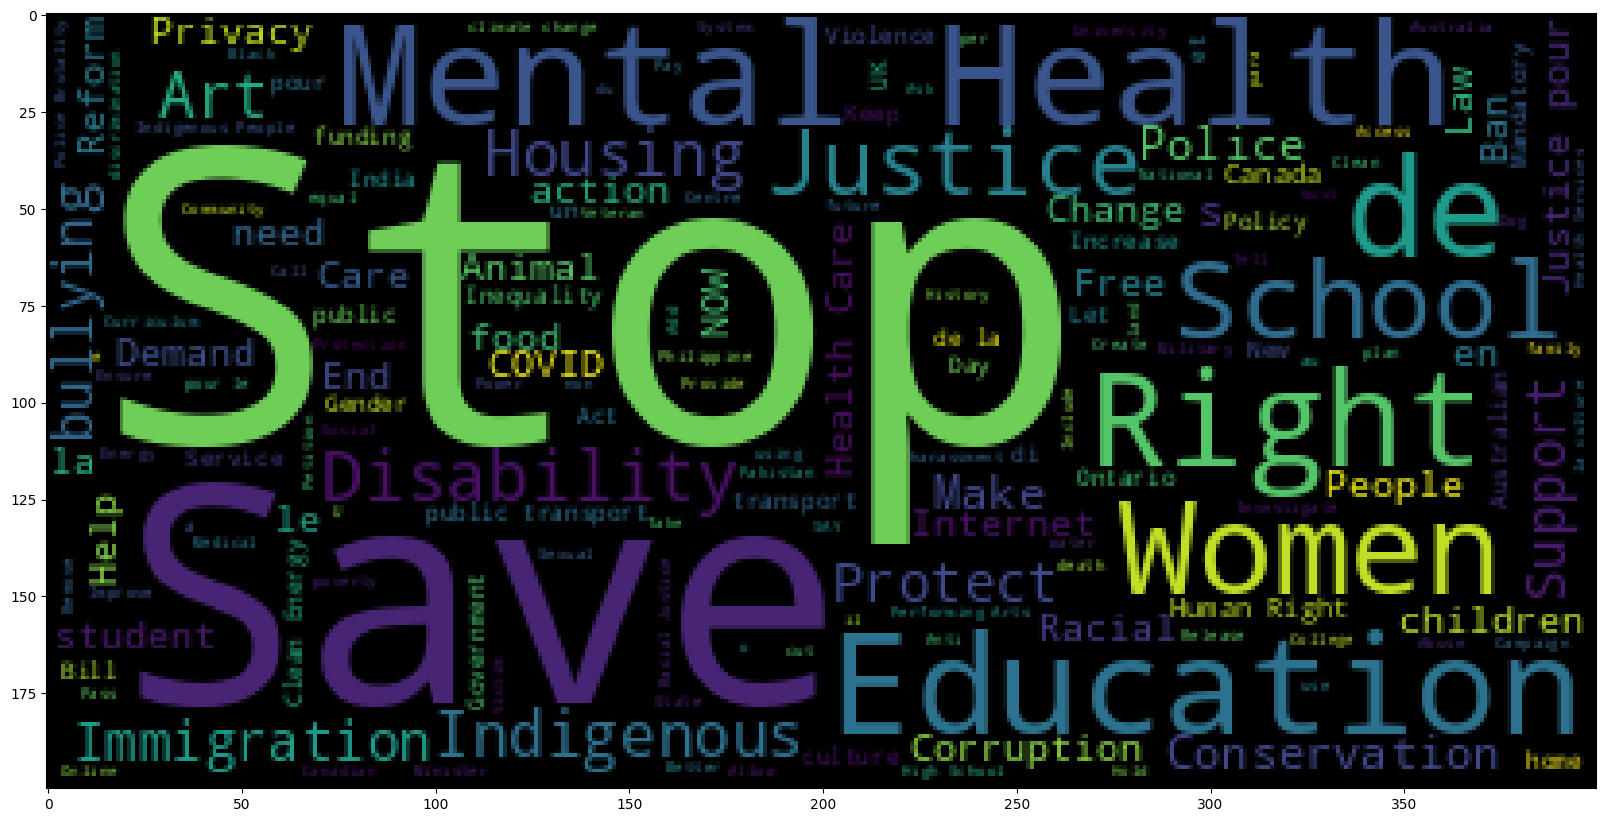

In [46]:
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

In [47]:
#Generar lista a partir de df positive
positive_list = positive['title'].tolist()
positive_list

['Grant Military Burial Honors to Women WWII Pilots',
 'Open a federal investigation into the fatal police shooting of John Crawford III. Release video of shooting.',
 'Playmobil: Please make disability toys and help generations of kids, grow up with a positive attitude to human difference!',
 'Let Nikki Peet Start A Gay-Straight Alliance in Corpus Christi, Texas',
 "Don't make domestic violence victims pay to stay safe",
 'Tell ICE to Stop Deportation of 19-Year-Old Aspiring Pastor, David Morales',
 'Stop ICE from Deporting Legal Immigrants Studying in the United States',
 'SAUVER PEN ER MEN',
 'Change the National Building Code to make housing accessible for all Australians',
 'Bring Back Crystal Pepsi',
 'Pour l’heure du conte drag',
 'Blue Cross Blue Shield: Henry Young Needs Rehab to Live',
 'Save the dignity of women and Girls #NoSilenceForViolence #MahilaMitra',
 "FEMA's first responders to Hurricane Sandy deserve federal health care benefits",
 'Eurospin: pubblicate il vostro i

## Nube de palabras más comunes en las peticiones exitosas

In [54]:
positive_sentences_as_one_string = " ".join(positive_list)

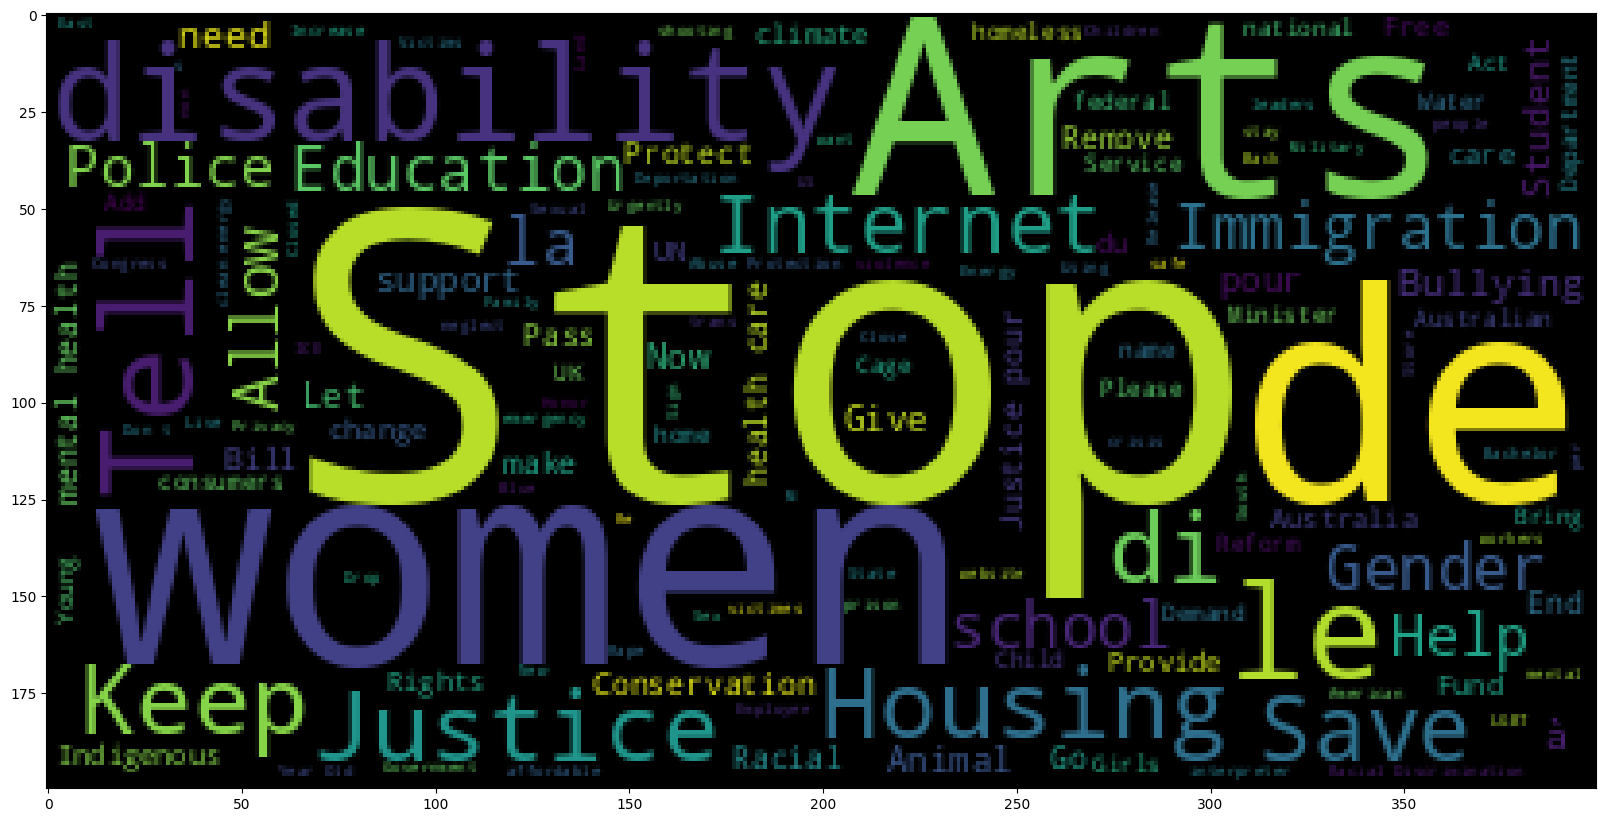

In [55]:
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(positive_sentences_as_one_string))